<a href="https://colab.research.google.com/github/crossorbit/hgmldl/blob/master/09_%EC%88%9C%ED%99%98_%EC%8B%A0%EA%B2%BD%EB%A7%9D_SimpleRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 간단히 하기 위해 num_words는 500으로 제한
from tensorflow.keras.datasets import imdb

(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words=500)


17473536/17464789 [==============================] - 0s 0us/step


In [2]:
print(train_input.shape, test_input.shape)
print(len(train_input[0]))
print(len(train_input[1]))

(25000,) (25000,)
218
189
[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [5]:
# 1 : 문장의 시작부분은 보통 토큰을 1로 지정함
# 2 : keras 어휘사전(num_words) 500개 단어에 포함되지 않으면 2로 채움
# train_input : [리뷰1, 리뷰2, ....]인 넘파이 배열 (리뷰 1 : 파이썬 리스트)
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [6]:
# 긍정 1, 부정 0
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [7]:
# 훈련세트 준비
from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

In [8]:
import numpy as np

lengths = np.array([len(x) for x in train_input])
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


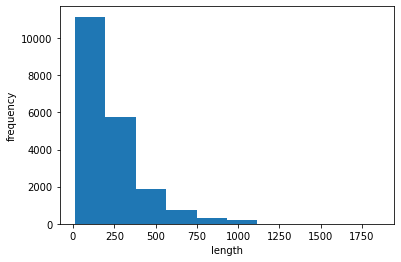

In [9]:
import matplotlib.pyplot as plt

plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [10]:
# 시퀀스 패딩 : 적절한 길이의 토큰 설정 필요. 너무 길면 나머지 공간이 텅 빈 공간으로 채워짐. 빈공간을 0으로 채우기. (pad_sequences 활용)
# median 값보다 조금 작게. 가능한 텍스트 샘플에 패딩이 너무 많이 포함되지 않도록
# 끝에서 시작해서 지정된 길이의 앞 부분을 잘라냄. 뒷부분이 더 의미가 있다고 판단해서. 패딩도 앞부분에 0을 채움.
# 토큰을 줄이면 연산속도 빨라짐
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)
print(train_seq.shape)
print(train_seq[0])

print(train_input[0][-10:])
print(train_seq[5])

val_seq = pad_sequences(val_input, maxlen=100)

(20000, 100)
[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]
[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]
[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [11]:
# 순환신경망 모델 만들기
# SimpleRNN : 뉴런의 갯수 지정 - 8. 
# 순환층이 하나 있는 2진분류 이기 때문에 시그모이드 함수 활용

from tensorflow import keras

model = keras.Sequential()

model.add(keras.layers.SimpleRNN(8, input_shape=(100, 500)))
model.add(keras.layers.Dense(1, activation='sigmoid'))


In [12]:
# 원-핫 인코딩
train_oh = keras.utils.to_categorical(train_seq)

print(train_oh.shape)
print(train_oh[0][0][:12])
print(np.sum(train_oh[0][0]))

val_oh = keras.utils.to_categorical(val_seq)

(20000, 100, 500)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
1.0


In [13]:
# SimpleRNN 가중치 4072 : 입력토큰 1개가 500개 원핫인코딩으로 변환된 상태, 500개 입력 x 8개 뉴런 + 순환되는 은닉상태(simpleRNN의 뉴런의 갯수) 8개 x 8개의 뉴런에 완전 연결 + 8개 절편(뉴런)
# Dense 가중치 9 : 출력 8개 x 덴스층 1개 뉴런 + 1개 절편
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 4072      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


In [15]:
# 순환신경망 모델 훈련하기
# rmsprop 옵티마이저 사용
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', 
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model.fit(train_oh, train_target, epochs=20, batch_size=64,
                    validation_data=(val_oh, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/20
313/313 [==============================] - 9s 26ms/step - loss: 0.4625 - accuracy: 0.7968 - val_loss: 0.4857 - val_accuracy: 0.7836
Epoch 2/20
313/313 [==============================] - 8s 26ms/step - loss: 0.4575 - accuracy: 0.7988 - val_loss: 0.4791 - val_accuracy: 0.7842
Epoch 3/20
313/313 [==============================] - 8s 26ms/step - loss: 0.4531 - accuracy: 0.8005 - val_loss: 0.4755 - val_accuracy: 0.7848
Epoch 4/20
313/313 [==============================] - 8s 26ms/step - loss: 0.4485 - accuracy: 0.8033 - val_loss: 0.4770 - val_accuracy: 0.7814
Epoch 5/20
313/313 [==============================] - 8s 26ms/step - loss: 0.4446 - accuracy: 0.8056 - val_loss: 0.4713 - val_accuracy: 0.7864
Epoch 6/20
313/313 [==============================] - 8s 26ms/step - loss: 0.4409 - accuracy: 0.8066 - val_loss: 0.4696 - val_accuracy: 0.7832
Epoch 7/20
313/313 [==============================] - 8s 26ms/step - loss: 0.4377 - accuracy: 0.8092 - val_loss: 0.4680 - val_accuracy: 0.7854

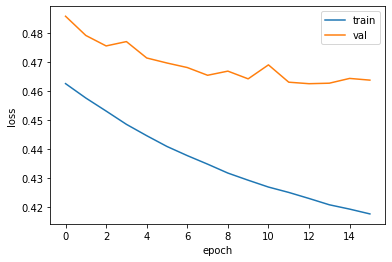

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [23]:
# 단어 임베딩 사용하기
# 임베딩 :  토큰을 원핫인코딩이 아닌 지정된 실수 벡터로 변환하는 방식
# Embedding : 500개 어휘사전, 출력은 16차원(16개 벡터로) - SimpleRNN은 500개 출력이지만, Embedding 통해 16개로 줄일 수 있음 , 타임스텝의 갯수는 100개
# 8000 : 500개 입력 x 16개 벡터
# 은닉 순환층 가중치 200 : 16개 출력 x 8개 뉴런 + 8개 뉴런의 은닉상태 출력인 8 x  8개 뉴런과 완전 연결 + 8개 절편
# 덴스층 가중치 9 : 8 x 1 + 1
model2 = keras.Sequential()

model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           8000      
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


In [24]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', 
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 6s 17ms/step - loss: 0.6967 - accuracy: 0.5086 - val_loss: 0.6907 - val_accuracy: 0.5320
Epoch 2/100
313/313 [==============================] - 5s 17ms/step - loss: 0.6794 - accuracy: 0.5753 - val_loss: 0.6722 - val_accuracy: 0.5994
Epoch 3/100
313/313 [==============================] - 5s 17ms/step - loss: 0.6553 - accuracy: 0.6380 - val_loss: 0.6406 - val_accuracy: 0.6794
Epoch 4/100
313/313 [==============================] - 5s 16ms/step - loss: 0.6215 - accuracy: 0.7049 - val_loss: 0.6152 - val_accuracy: 0.7158
Epoch 5/100
313/313 [==============================] - 5s 17ms/step - loss: 0.5972 - accuracy: 0.7339 - val_loss: 0.5934 - val_accuracy: 0.7320
Epoch 6/100
313/313 [==============================] - 5s 16ms/step - loss: 0.5759 - accuracy: 0.7504 - val_loss: 0.5786 - val_accuracy: 0.7376
Epoch 7/100
313/313 [==============================] - 5s 16ms/step - loss: 0.5572 - accuracy: 0.7609 - val_loss: 0.5625 - val_accuracy:

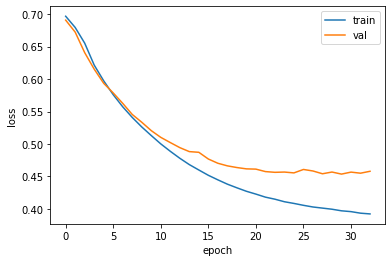

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()